# Lab3- Cyber Risk Regression and Logistic classification (Student Template)

⚠️**IMPORTANT — READ FIRST**

Do NOT edit this template directly

1. Click File → Save a copy in Drive
2. Rename your notebook: `Lab3_YourName.ipynb`.
3. Complete all tasks by writing code in the empty cells.
4. Do NOT modify cells marked **PROVIDED — DO NOT MODIFY**.
5. Run all cells before submission so outputs are visible.
6. Download and submit the `.ipynb` file before the deadline.






















**Learning Objectives**

By the end of this lab, you will be able to:

1-Build multiple and polynomial regression models

2-Evaluate regression using MAE, RMSE, R²

3-Apply feature scaling

4-Use Ridge and Lasso regularization

5-Apply cross-validation

6-Convert a regression problem into binary classification

7-Train and evaluate Logistic Regression

8-Interpret results in a cyber risk context

**Dataset Description**

Each row represents one network session.

**Features (X)**

failed_logins: number of failed login attempts

data_volume_mb: data transferred during session (MB)

unusual_time: 1 if login occurred at unusual time, else 0

patch_age_days: days since last system patch

admin_login: 1 if admin account used

**Target (y)**

risk_score: cyber risk score between 0 and 100

This dataset is synthetic, created only for learning purposes.

**Imports** (PROVIDED — DO NOT MODIFY)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


**Dataset Generation** (PROVIDED — DO NOT MODIFY)

In [ ]:
# ======================================================
# Synthetic Cyber Risk Dataset (PROVIDED — DO NOT MODIFY)
# ======================================================
# Each row represents one network session.
# This dataset is generated only for learning purposes.
# The goal is to predict a cyber risk score (0–100).

import numpy as np
import pandas as pd

np.random.seed(42)
n_samples = 500

# -------------------------------
# Input Features (X)
# -------------------------------

# Number of failed login attempts in the session
failed_logins = np.random.poisson(lam=2, size=n_samples)

# Amount of data transferred during the session (in MB)
data_volume_mb = np.random.normal(loc=300, scale=120, size=n_samples).clip(50, 1000)

# Whether the session occurred at an unusual time (1 = yes, 0 = no)
unusual_time = np.random.binomial(1, 0.25, size=n_samples)

# Days since the system was last patched
patch_age_days = np.random.randint(0, 365, size=n_samples)

# Whether an admin account was used in the session
admin_login = np.random.binomial(1, 0.15, size=n_samples)

# -------------------------------
# Target Variable (y)
# -------------------------------
# Cyber risk score:
# - Higher values indicate higher security risk
# - Combines linear, nonlinear, and noisy effects
risk_score = (
    5 * failed_logins +
    0.04 * data_volume_mb +
    15 * unusual_time +
    0.03 * patch_age_days +
    20 * admin_login +
    0.5 * failed_logins**2 +           # nonlinear effect
    np.random.normal(0, 5, size=n_samples)  # noise
)

# Limit risk score to the range 0–100
risk_score = np.clip(risk_score, 0, 100)

# -------------------------------
# Create Final Dataset
# -------------------------------
df = pd.DataFrame({
    "failed_logins": failed_logins,
    "data_volume_mb": data_volume_mb,
    "unusual_time": unusual_time,
    "patch_age_days": patch_age_days,
    "admin_login": admin_login,
    "risk_score": risk_score
})

# Preview the dataset
df.head()



,failed_logins,data_volume_mb,unusual_time,patch_age_days,admin_login,risk_score
0,4,491.340608,0,216,0,54.978987
1,1,198.364638,0,119,0,15.001039
2,3,181.032918,0,174,0,21.995223
3,3,50.000000,0,22,0,11.908258
4,1,223.324590,0,212,1,43.741031


**Train–Test Split** (PROVIDED — DO NOT MODIFY)

In [ ]:
# -------------------------------------------
# Train–Test Split-(PROVIDED — DO NOT MODIFY)
# -------------------------------------------
# X: input features, y: target (risk score)
X = df.drop(columns=["risk_score"])
y = df["risk_score"]

# Split data into training and test sets
# Test set simulates unseen (future) network sessions
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

**Regression Metrics Helper**(PROVIDED — DO NOT MODIFY)

In [ ]:
# -------------------------------------------------------
# Regression Evaluation Metrics-(PROVIDED — DO NOT MODIFY)
# -------------------------------------------------------
# This function reports common regression metrics:
# MAE  -> average prediction error
# RMSE -> penalizes large errors
# R²   -> proportion of variance explained
def regression_report(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(model_name)
    print(f"  MAE : {mae:.3f}")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  R²  : {r2:.3f}")


# ✅ Student Tasks

Write your code in the empty code cells under each task.

**Tip:** call Regression Evaluation Metrics using `regression_report(y_test, y_pred, "Model Name")`.

**Task 1 — Multiple Linear Regression**

**Goal:**  
Establish a baseline model for predicting cyber risk score.

**What to do:**  
- Train a Multiple Linear Regression model on the training data.
- Evaluate it on the test set.

**What to observe:**  
- Record MAE, RMSE, and R².
- This baseline will be used to compare all other regression models.

In [ ]:
# Student code here
from  sklearn.linear_model import LinearRegression

model = LinearRegression()

# Corrected variable names to match the defined variables (X_train, y_train, X_test)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

regression_report(y_test, y_pred, "Multiple Linear Regression")


Multiple Linear Regression
  MAE : 4.307
  RMSE: 5.388
  R²  : 0.892


### Short Info for Task 2 -Why do we transform the input features?

Linear Regression can only learn **straight-line (linear) relationships** between the input features and the target.

However, in cyber risk assessment, relationships are often **nonlinear**.
For example:
- A few failed logins may have little impact on risk,
- But many failed logins can increase risk much faster.

Polynomial feature transformation creates **new features** (such as squared terms) from the original inputs.
This allows a linear regression model to learn **curved (nonlinear) patterns**.

Important notes:
- We transform **only the input features (X)**, never the target (y).
- We use `fit_transform` on the training data and `transform` on the test data
  to ensure the test data does not influence the training process.

In short:
> Polynomial regression is still linear regression, but applied to transformed features.


## Task 2 — Polynomial Regression (Degree = 2)

**Goal:**  
Capture nonlinear relationships in the cyber risk data.

**What to do:**  
- Use polynomial features of degree 2.
- Train a regression model using these features.

**What to observe:**  
- Compare performance with linear regression.
- Check whether the model improves or begins to overfit.




In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluate
regression_report(y_test, y_pred_poly, "Polynomial Regression (Degree 2)")


Polynomial Regression (Degree 2)
  MAE : 4.383
  RMSE: 5.613
  R²  : 0.883


## Task 3 — Ridge Regression (L2 Regularization)

**Goal:**  
Reduce overfitting by penalizing large coefficients.Ridge regression adds a regularization term that makes the model
more stable without changing the number of features.

**What to do:**  
- Apply feature scaling.
- Train Ridge Regression using 5-fold cross-validation.

**What to observe:**  
- Observe how regularization affects RMSE.
- Compare stability with previous models.


In [ ]:
# Student code here
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

y_pred_ridge = best_model.predict(X_test)

regression_report(y_test, y_pred_ridge, "Ridge Regression")


Ridge Regression
  MAE : 4.307
  RMSE: 5.387
  R²  : 0.892


## Task 4 — Lasso Regression (L1 Regularization)

**Goal:**  
Perform regularization and implicit feature selection.
Lasso can shrink some coefficients to zero, effectively removing features.

**What to do:**  
- Apply Lasso Regression with feature scaling.
- Use cross-validation to evaluate performance.
Note: After cross-validation, we fit Lasso once on the full training set to inspect coefficients.


**What to observe:**  
- Identify coefficients that are reduced to zero.If none become 0, try a larger alpha and observe the change
- Compare performance with Ridge Regression.


In [ ]:
# Student code here

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])

param_grid_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]
}

grid_lasso = GridSearchCV(
    pipeline_lasso,
    param_grid_lasso,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

grid_lasso.fit(X_train, y_train)

best_lasso = grid_lasso.best_estimator_


print("Best alpha:", grid_lasso.best_params_)
print("Best CV RMSE:", -grid_lasso.best_score_)


Best alpha: {'lasso__alpha': 0.001}
Best CV RMSE: 4.852049127792784


## Task 5 — Ridge vs Lasso Coefficients

**Goal:**  
Understand how different regularization methods affect model parameters.

**What to do:**  
- Inspect the learned coefficients from both models.

**What to observe:**  
- Which features are shrunk most?
- Does Lasso eliminate any features?




In [ ]:
# Student code here
import pandas as pd

# Get coefficients
ridge_coefs = best_model.named_steps['ridge'].coef_
lasso_coefs = best_lasso.named_steps['lasso'].coef_

# If X_train is a DataFrame
feature_names = X_train.columns

# Create comparison table
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Ridge Coefficient": ridge_coefs,
    "Lasso Coefficient": lasso_coefs
})

# Sort by absolute Ridge importance (optional but makes it cleaner)
coef_df["Abs Ridge"] = coef_df["Ridge Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs Ridge", ascending=False)
coef_df = coef_df.drop(columns=["Abs Ridge"])

display(coef_df)

# Count how many features Lasso eliminated
num_zero = sum(lasso_coefs == 0)
print("\nNumber of features eliminated by Lasso:", num_zero)


,Feature,Ridge Coefficient,Lasso Coefficient
0,failed_logins,10.348441,10.350054
4,admin_login,7.695686,7.696636
2,unusual_time,5.953478,5.954087
1,data_volume_mb,4.876634,4.876723
3,patch_age_days,2.922250,2.921870



Number of features eliminated by Lasso: 0


## Task 6 — Convert Risk Score to Binary Labels

**Goal:**  
Transform a regression problem into a binary classification problem.

**What to do:**  
- Label sessions as High Risk (1) or Low Risk (0) using a threshold of 70.

**What to observe:**  
- The task changes from predicting a continuous value to predicting a class label..


In [ ]:
# Student code here
threshold = 70

# Convert true values
y_train_binary = (y_train >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

# Show distribution
print("Training set class distribution:")
print(y_train_binary.value_counts())

print("\nTest set class distribution:")
print(y_test_binary.value_counts())



Training set class distribution:
risk_score
0    386
1     14
Name: count, dtype: int64

Test set class distribution:
risk_score
0    98
1     2
Name: count, dtype: int64


## Task 7 — Logistic Regression for Cyber Risk Classification

**Goal:**  
Classify network sessions as High Risk or Low Risk.

**What to do:**  
- Train a Logistic Regression model.
- Evaluate using confusion matrix and classification metrics.

**What to observe:**  
- Focus on recall and precision.
- Consider which metric is most important for cyber risk.


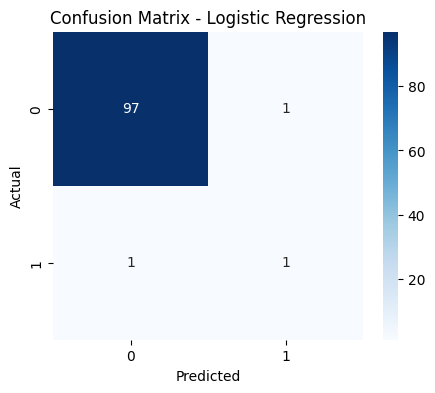

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        98
           1       0.50      0.50      0.50         2

    accuracy                           0.98       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.98      0.98      0.98       100



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Create pipeline (scaling is important!)
pipeline_log = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])

# Train model
pipeline_log.fit(X_train, y_train_binary)

# Predict
y_pred_log = pipeline_log.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_log)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Classification report
#Answer on Reflection Questions.
#1, Which regression model performed best and why? Answer Polynomial regresion performed best because it had the lowest RMSE and highest R2, it predicted cyber risk scores  most accurately.
#2, How did Ridge and Lasso differ in their coefficients? Ridge shrinks coefficients but keeps  all features. Lasso can shrink some coefficients to zero, performing feature selection.
#3, In cyber risk assessment, why is recall often more important than acuracy? Because missing a high risk case with false negative is more dangerous than having some false alarms.

print(classification_report(y_test_binary, y_pred_log))


**Reflection Questions (Answer Below)**
1. Which regression model performed best and why?
2. How did Ridge and Lasso differ in their coefficients?
3. In cyber risk assessment, why is recall often more important than accuracy?


## Final Checklist

- [ ] All tasks completed
- [ ] All cells run without errors
- [ ] Outputs are visible
- [ ] Renamed to `Lab1_YourName.ipynb`
- [ ] Downloaded and submitted the `.ipynb` via the Canvas

